In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [ ]:
data_bitcoin=df[df.symbol == "BTC"]
# train, test_data = train_test_split(data_bitcoin, test_size=0.25, random_state=42, shuffle=True)

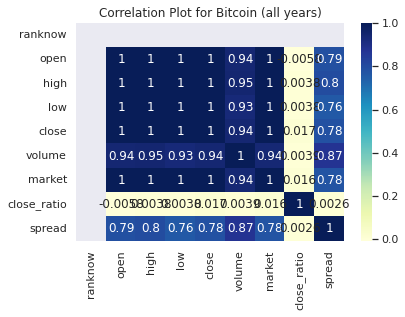

In [ ]:
dataplot = sb.heatmap(data_bitcoin.corr(), cmap="YlGnBu", annot=True).set(title='Correlation Plot for Bitcoin (all years)')

In [ ]:
data_bitcoin_2013 = data_bitcoin[data_bitcoin['date'] < '2014-01-01']
data_bitcoin_2014 = data_bitcoin[data_bitcoin['date'] < '2015-01-01']
data_bitcoin_2015 = data_bitcoin[data_bitcoin['date'] < '2016-01-01']
data_bitcoin_2016 = data_bitcoin[data_bitcoin['date'] < '2017-01-01']
data_bitcoin_2017 = data_bitcoin[data_bitcoin['date'] < '2018-01-01']
data_bitcoin_2018 = data_bitcoin[data_bitcoin['date'] < '2019-01-01']

[Text(0.5, 1.0, '2018')]

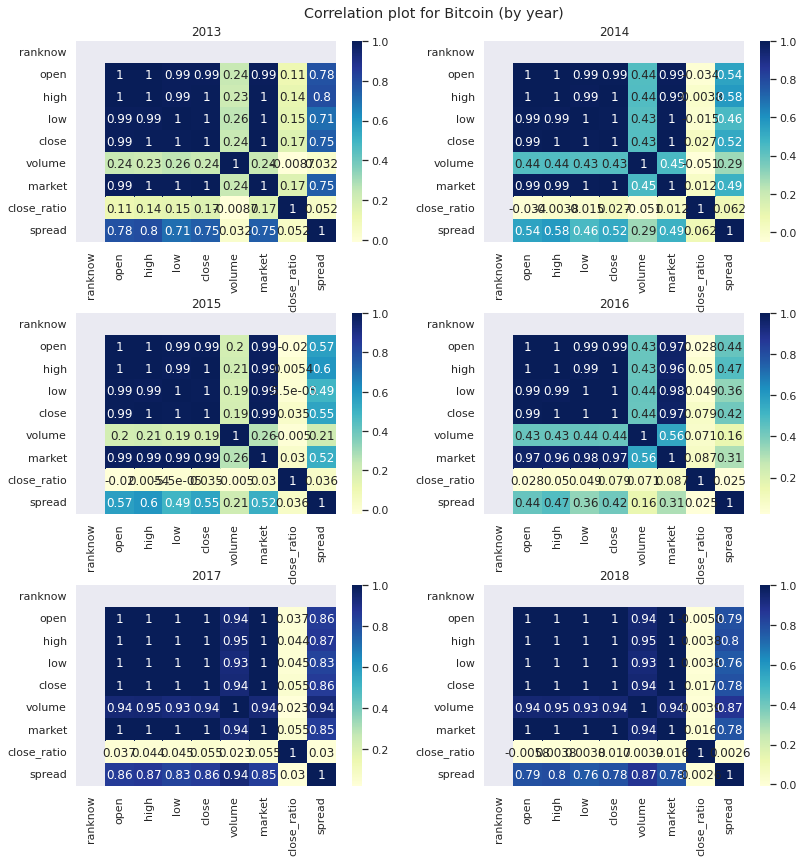

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

fig.tight_layout(pad=4)
fig.suptitle("Correlation plot for Bitcoin (by year)")

sb.heatmap(data_bitcoin_2013.corr(), cmap="YlGnBu", annot=True, ax=axes[0,0]).set(title='2013')
sb.heatmap(data_bitcoin_2014.corr(), cmap="YlGnBu", annot=True, ax=axes[0,1]).set(title='2014')
sb.heatmap(data_bitcoin_2015.corr(), cmap="YlGnBu", annot=True, ax=axes[1,0]).set(title='2015')
sb.heatmap(data_bitcoin_2016.corr(), cmap="YlGnBu", annot=True, ax=axes[1,1]).set(title='2016')
sb.heatmap(data_bitcoin_2017.corr(), cmap="YlGnBu", annot=True, ax=axes[2,0]).set(title='2017')
sb.heatmap(data_bitcoin_2018.corr(), cmap="YlGnBu", annot=True, ax=axes[2,1]).set(title='2018')

In [ ]:
# data_bitcoin['mean'] = (data_bitcoin['open'] + data_bitcoin['high'] + data_bitcoin['low'] + data_bitcoin['close']) / 4
# data_bitcoin['prediction'] = data_bitcoin['close'].shift(-30)

In [ ]:
data_bitcoin['open_log'] = np.log1p(data_bitcoin['open'])
data_bitcoin['high_log'] = np.log1p(data_bitcoin['high'])
data_bitcoin['low_log'] = np.log1p(data_bitcoin['low'])
data_bitcoin['close_log'] = np.log1p(data_bitcoin['close'])
# data_bitcoin['mean_log'] = np.log1p(data_bitcoin['mean'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data_bitcoin

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_log,high_log,low_log,close_log
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,4.914858,4.919835,4.891101,4.906829
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,4.908529,5.000518,4.905275,4.980451
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,4.976734,4.996739,4.905645,4.941642
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,4.941642,4.947979,4.688776,4.770600
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,4.765417,4.841033,4.535606,4.665418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,8.264049,8.324062,8.184809,8.296788
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,8.298059,8.320726,8.201090,8.237514
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,8.234021,8.259448,8.205767,8.248456
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,8.248914,8.386378,8.248914,8.356653


In [ ]:
# import matplotlib.dates as mdates
# import numpy as np

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot('date', 'open', data=data_bitcoin)
ax2.plot('date', 'high', data=data_bitcoin)
ax3.plot('date', 'low', data=data_bitcoin)
ax4.plot('date', 'close', data=data_bitcoin)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot('date', 'open_log', data=data_bitcoin)
ax2.plot('date', 'high_log', data=data_bitcoin)
ax3.plot('date', 'low_log', data=data_bitcoin)
ax4.plot('date', 'close_log', data=data_bitcoin)


# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
# ax1.plot('date', 'open_log_10', data=data_bitcoin)
# ax2.plot('date', 'high_log_10', data=data_bitcoin)
# ax3.plot('date', 'low_log_10', data=data_bitcoin)
# ax4.plot('date', 'close_log_10', data=data_bitcoin)

# # format the ticks
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
# ax.xaxis.set_minor_locator(months)

# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.grid(True)
# fig.autofmt_xdate()

# plt.show()

In [ ]:
data_bitcoin.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread', 'open_log',
       'high_log', 'low_log', 'close_log'],
      dtype='object')

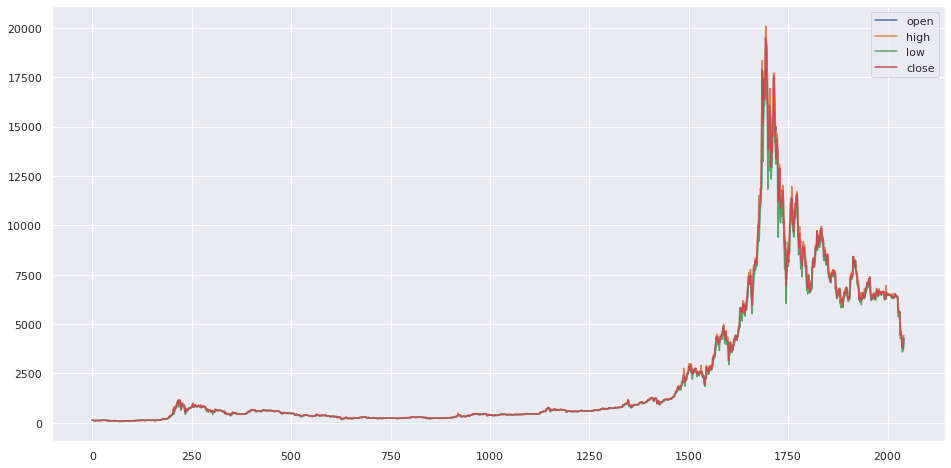

In [ ]:
# let us see the trends of Bitcoin price since 2013
data_bitcoin[['open','high','low','close']].plot(figsize=(16,8))
plt.show()
# #since 2017, the Bitcoin price has a rocket speed,let us see closer
# Bitcoin_price1718 = df[df['name']=='Bitcoin'].loc['2017':]
# Bitcoin_price1718[['open','high','low','close']].plot(figsize=(16,8))
# plt.show()

In [ ]:
data_bitcoin_work = data_bitcoin.copy()

In [ ]:
data_bitcoin_work

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,open_log,high_log,low_log,close_log
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,4.914858,4.919835,4.891101,4.906829
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,4.908529,5.000518,4.905275,4.980451
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,4.976734,4.996739,4.905645,4.941642
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,4.941642,4.947979,4.688776,4.770600
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,4.765417,4.841033,4.535606,4.665418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,8.264049,8.324062,8.184809,8.296788
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,8.298059,8.320726,8.201090,8.237514
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,8.234021,8.259448,8.205767,8.248456
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,8.248914,8.386378,8.248914,8.356653


In [ ]:
data_bitcoin_work.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread', 'open_log',
       'high_log', 'low_log', 'close_log'],
      dtype='object')

In [ ]:
data_bitcoin_work.drop(['slug','symbol','name','ranknow','close_ratio','open_log','high_log', 'low_log', 'close_log'],axis=1,inplace=True)
data_bitcoin_work.tail()

,date,open,high,low,close,volume,market,spread
2037,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,535.81
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,463.22
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,201.95
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,563.43
2041,2018-11-29,4269.00,4413.02,4145.77,4278.85,6.503348e+09,7.445102e+10,267.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
from datetime import datetime
from datetime import timedelta
from sklearn.ensemble import *
from sklearn.tree import *
sns.set()

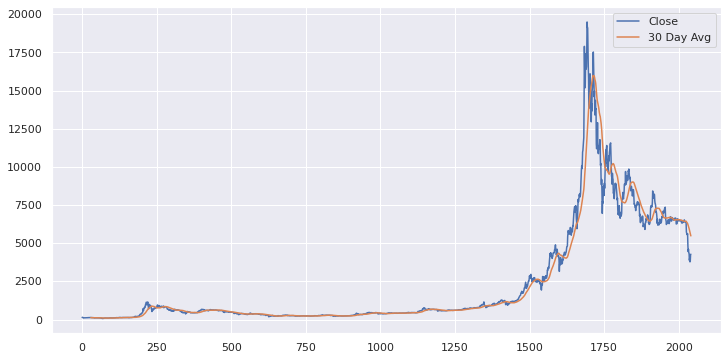

In [ ]:
data_bitcoin_work['close'].plot(figsize=(12,6),label='Close')
data_bitcoin_work['close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [ ]:
data_bitcoin_work.dtypes
data_bitcoin_work['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(data_bitcoin_work.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
market           float64
spread           float64
dtype: object


In [ ]:
data_bitcoin_1 = data_bitcoin_work[['date', 'open', 'high', 'low', 'close']].copy()

In [ ]:
period = 30
minmax = MinMaxScaler().fit(data_bitcoin_1.iloc[:, 3].values.reshape((-1,1)))
close_normalize = minmax.transform(data_bitcoin_1.iloc[:, 3].values.reshape((-1,1)))
normalized = pd.DataFrame(close_normalize)
normalized['Price_After_period']=normalized[0].shift(-period)
normalized.dropna(inplace=True)
X=normalized.drop('Price_After_period',axis=1)
print(normalized.head())
y=normalized['Price_After_period']
print(X.head())
y.head()

          0  Price_After_period
0  0.003521            0.003177
1  0.003621            0.003286
2  0.003624            0.003251
3  0.002231            0.003219
4  0.001415            0.003261
          0
0  0.003521
1  0.003621
2  0.003624
3  0.002231
4  0.001415


0    0.003177
1    0.003286
2    0.003251
3    0.003219
4    0.003261
Name: Price_After_period, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [ ]:
import math
from sklearn.metrics import *
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.ensemble import *
rf = RandomForestRegressor(n_estimators=500, random_state=101)
dt = DecisionTreeRegressor(random_state=101)

In [ ]:
rf.fit(train_X, train_Y)
dt.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=101)

In [ ]:
preds_rf = rf.predict(test_X)
preds_dt = dt.predict(test_X)

In [ ]:
accuracy=dt.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Decision Tree Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_dt)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_dt))

Decision Tree Accuracy is: 84.1692 %
Test data RMSE:  0.06719137529028987
Test data MAE:  0.027296601606216154


In [ ]:
accuracy=rf.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Random Forest Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_rf)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_rf))

Random Forest Accuracy is: 90.0726 %
Test data RMSE:  0.053208437997409624
Test data MAE:  0.022986325113653252


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_X,train_Y)
preds = xg_reg.predict(test_X)

[21:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(test_Y, preds))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(test_Y, preds)
print("MAE: %f" % (mae))
accuracy=xg_reg.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('XGBoost Accuracy is:',accuracy,'%')

RMSE: 0.154319
MAE: 0.147927
XGBoost Accuracy is: 16.4951 %


In [ ]:
##### LSTM
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=16,verbose=1)

Epoch 1/10
101/101 [==============================] - 2s 6ms/step - loss: 0.0391 - val_loss: 0.0297
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.0263
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0227
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0231 - val_loss: 0.0174
Epoch 5/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.0113
Epoch 6/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0069
Epoch 7/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 8/10
101/101 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 9/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 10/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0044

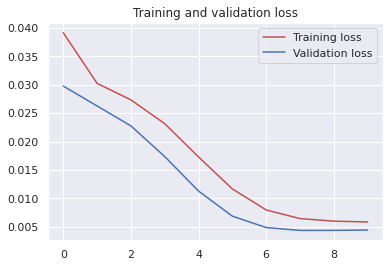

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)
train_predict.shape, test_predict.shape

((1609, 1), (403, 1))

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(train_Y,train_predict)))
print("Train data MSE: ", mean_squared_error(train_Y,train_predict))
print("Train data MAE: ", mean_absolute_error(train_Y,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,test_predict)))
print("Test data MSE: ", mean_squared_error(test_Y,test_predict))
print("Test data MAE: ", mean_absolute_error(test_Y,test_predict))

Train data RMSE:  0.07617787812483748
Train data MSE:  0.005803069115602593
Train data MAE:  0.03847235160041683
-------------------------------------------------------------------------------------
Test data RMSE:  0.06660221662236981
Test data MSE:  0.004435855259013075
Test data MAE:  0.036157145705075416


In [ ]:
X_30 =X[-30:]
forecast = dt.predict(X_30)

from datetime import datetime,timedelta
last_date = data_bitcoin_work.iloc[-1].name
#last_date.to_datetime(df['date'], format='%Y-%m-%d')
last_date = datetime.strptime(last_date, '%Y-%m-%d').date()
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data_bitcoin_work=data_bitcoin_work.append(df1)
data_bitcoin_work.tail(30)
# In real world ,The price of Bitcoin reached 18870 in Dec.16th,my prediction is 18401;
# The next day,it went to 19458 in Dec.17th and my predicition is 18921;
# It looks smart.

#let us see what the baby looks like
data_bitcoin_work['close'].plot(figsize=(16,8),label='Close',color = 'red')
data_bitcoin_work['Forecast'].plot(label='forecast',color = 'blue')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime,timedelta
last_date = data_bitcoin_work.iloc[-1].name
#last_date.to_datetime(df['date'], format='%Y-%m-%d')
last_date = datetime.strptime(last_date, '%Y-%m-%d').date()
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data_bitcoin_work=data_bitcoin_work.append(df1)
data_bitcoin_work.tail(30)
# In real world ,The price of Bitcoin reached 18870 in Dec.16th,my prediction is 18401;
# The next day,it went to 19458 in Dec.17th and my predicition is 18921;
# It looks smart.

#let us see what the baby looks like
data_bitcoin_work['close'].plot(figsize=(16,8),label='Close',color = 'red')
data_bitcoin_work['Forecast'].plot(label='forecast',color = 'blue')
plt.legend()
plt.show()

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
X_30 =X[-30:]
forecast = reg.predict(X_30)

from datetime import datetime,timedelta
last_date = data_bitcoin_work.iloc[-1].name
#last_date.to_datetime(df['date'], format='%Y-%m-%d')
last_date = datetime.strptime(last_date, '%Y-%m-%d').date()
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
data_bitcoin_work=data_bitcoin_work.append(df1)
data_bitcoin_work.tail(30)
# In real world ,The price of Bitcoin reached 18870 in Dec.16th,my prediction is 18401;
# The next day,it went to 19458 in Dec.17th and my predicition is 18921;
# It looks smart.

#let us see what the baby looks like
data_bitcoin_work['close'].plot(figsize=(16,8),label='Close',color = 'red')
data_bitcoin_work['Forecast'].plot(label='forecast',color = 'blue')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))
accuracy=xg_reg.score(X_test, y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('XGBoost Accuracy is:',accuracy,'%')

In [ ]:
##### LSTM
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=16,verbose=1)

Epoch 1/10
114/114 [==============================] - 2s 7ms/step - loss: 17621446.0000 - val_loss: 14244029.0000
Epoch 2/10
114/114 [==============================] - 1s 5ms/step - loss: 12013126.0000 - val_loss: 1805829.1250
Epoch 3/10
114/114 [==============================] - 1s 5ms/step - loss: 2780566.7500 - val_loss: 1369870.2500
Epoch 4/10
114/114 [==============================] - 1s 5ms/step - loss: 2474740.7500 - val_loss: 1470883.6250
Epoch 5/10
114/114 [==============================] - 1s 6ms/step - loss: 2323194.5000 - val_loss: 1173873.2500
Epoch 6/10
114/114 [==============================] - 1s 10ms/step - loss: 2190131.5000 - val_loss: 1019670.2500
Epoch 7/10
114/114 [==============================] - 1s 6ms/step - loss: 2032242.7500 - val_loss: 903807.5000
Epoch 8/10
114/114 [==============================] - 1s 8ms/step - loss: 1918776.2500 - val_loss: 1152666.8750
Epoch 9/10
114/114 [==============================] - 1s 10ms/step - loss: 1868509.1250 - val_loss: 7

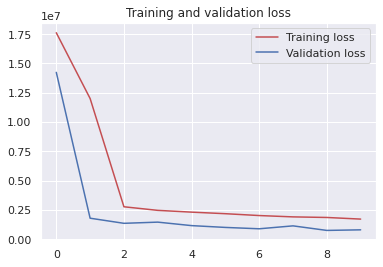

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((1810, 1), (202, 1))

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  1301.1365249367193
Train data MSE:  1692956.2565244017
Train data MAE:  572.1290954205423
-------------------------------------------------------------------------------------
Test data RMSE:  902.4954692383943
Test data MSE:  814498.0719958295
Test data MAE:  444.4314290747312


In [ ]:
data_bitcoin_work.drop(['slug','symbol','name','ranknow','close_ratio'],axis=1,inplace=True)

In [ ]:
data_bitcoin_nlog = data_bitcoin_work.copy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
from datetime import datetime
from datetime import timedelta
from sklearn.ensemble import *
from sklearn.tree import *
sns.set()

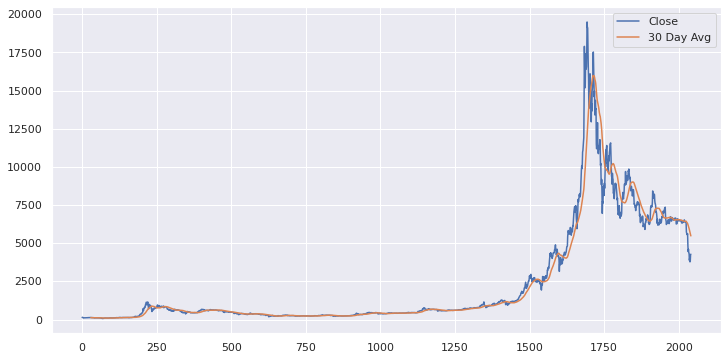

In [ ]:
data_bitcoin_work['close'].plot(figsize=(12,6),label='Close')
data_bitcoin_work['close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [ ]:
data_bitcoin_work.dtypes
data_bitcoin_work['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(data_bitcoin_work.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
market           float64
spread           float64
dtype: object


In [ ]:
data_bitcoin_1 = data_bitcoin_work[['date', 'open', 'high', 'low', 'close']].copy()

In [ ]:
data_bitcoin_1

,date,open,high,low,close
0,2013-04-28,135.30,135.98,132.10,134.21
1,2013-04-29,134.44,147.49,134.00,144.54
2,2013-04-30,144.00,146.93,134.05,139.00
3,2013-05-01,139.00,139.89,107.72,116.99
4,2013-05-02,116.38,125.60,92.28,105.21
...,...,...,...,...,...
2037,2018-11-25,3880.78,4120.87,3585.06,4009.97
2038,2018-11-26,4015.07,4107.14,3643.92,3779.13
2039,2018-11-27,3765.95,3862.96,3661.01,3820.72
2040,2018-11-28,3822.47,4385.90,3822.47,4257.42


In [ ]:
period = 30
minmax = MinMaxScaler().fit(data_bitcoin_1.iloc[:, 3].values.reshape((-1,1)))
close_normalize = minmax.transform(data_bitcoin_1.iloc[:, 3].values.reshape((-1,1)))
normalized = pd.DataFrame(close_normalize)
normalized['Price_After_period']=normalized[0].shift(-period)
normalized.dropna(inplace=True)
X=normalized.drop('Price_After_period',axis=1)
print(normalized.head())
y=normalized['Price_After_period']
print(X.head())
y.head()

          0  Price_After_period
0  0.003521            0.003177
1  0.003621            0.003286
2  0.003624            0.003251
3  0.002231            0.003219
4  0.001415            0.003261
          0
0  0.003521
1  0.003621
2  0.003624
3  0.002231
4  0.001415


0    0.003177
1    0.003286
2    0.003251
3    0.003219
4    0.003261
Name: Price_After_period, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [ ]:
import math
from sklearn.metrics import *
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.ensemble import *
rf = RandomForestRegressor(n_estimators=500, random_state=101)
dt = DecisionTreeRegressor(random_state=101)

In [ ]:
rf.fit(train_X, train_Y)
dt.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=101)

In [ ]:
preds_rf = rf.predict(test_X)
preds_dt = dt.predict(test_X)

In [ ]:
accuracy=dt.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Decision Tree Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_dt)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_dt))

Decision Tree Accuracy is: 84.1692 %
Test data RMSE:  0.06719137529028987
Test data MAE:  0.027296601606216154


In [ ]:
accuracy=rf.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Random Forest Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_rf)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_rf))

Random Forest Accuracy is: 90.0726 %
Test data RMSE:  0.053208437997409624
Test data MAE:  0.022986325113653252


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_X,train_Y)
preds = xg_reg.predict(test_X)

[01:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(test_Y, preds))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(test_Y, preds)
print("MAE: %f" % (mae))
accuracy=xg_reg.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('XGBoost Accuracy is:',accuracy,'%')

RMSE: 0.154319
MAE: 0.147927
XGBoost Accuracy is: 16.4951 %


In [ ]:
##### LSTM
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=16,verbose=1)

Epoch 1/10
101/101 [==============================] - 2s 5ms/step - loss: 0.0374 - val_loss: 0.0283
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0249
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0224
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0236 - val_loss: 0.0191
Epoch 5/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0151
Epoch 6/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0112
Epoch 7/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0080
Epoch 8/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 9/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0050
Epoch 10/10
101/101 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0046

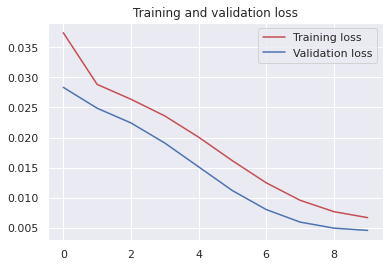

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)
train_predict.shape, test_predict.shape

((1609, 1), (403, 1))

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(train_Y,train_predict)))
print("Train data MSE: ", mean_squared_error(train_Y,train_predict))
print("Train data MAE: ", mean_absolute_error(train_Y,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,test_predict)))
print("Test data MSE: ", mean_squared_error(test_Y,test_predict))
print("Test data MAE: ", mean_absolute_error(test_Y,test_predict))

Train data RMSE:  0.0799770020054697
Train data MSE:  0.006396320849782904
Train data MAE:  0.04562663498776634
-------------------------------------------------------------------------------------
Test data RMSE:  0.06765960288594415
Test data MSE:  0.004577821862683662
Test data MAE:  0.04265627744851188


Nlog

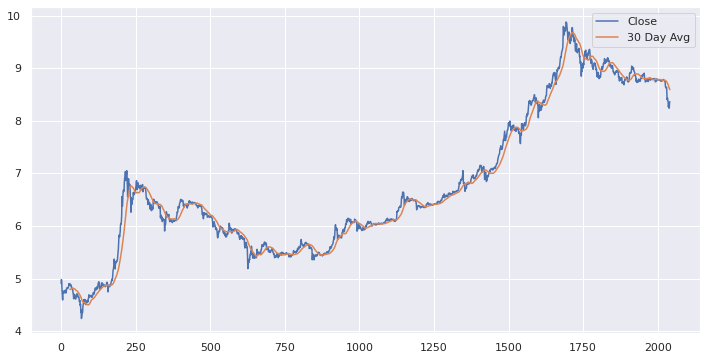

In [ ]:
data_bitcoin_nlog['close_log'].plot(figsize=(12,6),label='Close')
data_bitcoin_nlog['close_log'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [ ]:
data_bitcoin_nlog.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'market', 'spread',
       'open_log', 'high_log', 'low_log', 'close_log'],
      dtype='object')

In [ ]:
data_bitcoin_nl1 = data_bitcoin_nlog[['date', 'open_log', 'high_log', 'low_log', 'close_log']].copy()

In [ ]:
period = 30
minmax = MinMaxScaler().fit(data_bitcoin_nl1.iloc[:, 3].values.reshape((-1,1)))
close_normalize = minmax.transform(data_bitcoin_nl1.iloc[:, 3].values.reshape((-1,1)))
normalized = pd.DataFrame(close_normalize)
normalized['Price_After_period']=normalized[0].shift(-period)
normalized.dropna(inplace=True)
X=normalized.drop('Price_After_period',axis=1)
print(normalized.head())
y=normalized['Price_After_period']
print(X.head())
y.head()

          0  Price_After_period
0  0.122664            0.113807
1  0.125171            0.116663
2  0.125237            0.115753
3  0.086875            0.114922
4  0.059780            0.116029
          0
0  0.122664
1  0.125171
2  0.125237
3  0.086875
4  0.059780


0    0.113807
1    0.116663
2    0.115753
3    0.114922
4    0.116029
Name: Price_After_period, dtype: float64

In [ ]:
minmax

MinMaxScaler()

In [ ]:
close_normalize

array([[0.12266399],
       [0.12517124],
       [0.12523674],
       ...,
       [0.70899549],
       [0.71662762],
       [0.73098602]])

In [ ]:
normalized

,0,Price_After_period
0,0.122664,0.113807
1,0.125171,0.116663
2,0.125237,0.115753
3,0.086875,0.114922
4,0.059780,0.116029
...,...,...
2007,0.809144,0.705288
2008,0.809251,0.708168
2009,0.809097,0.708995
2010,0.805189,0.716628


In [ ]:
X

,0
0,0.122664
1,0.125171
2,0.125237
3,0.086875
4,0.059780
...,...
2007,0.809144
2008,0.809251
2009,0.809097
2010,0.805189


In [ ]:
y

0       0.113807
1       0.116663
2       0.115753
3       0.114922
4       0.116029
          ...   
2007    0.705288
2008    0.708168
2009    0.708995
2010    0.716628
2011    0.730986
Name: Price_After_period, Length: 2012, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=101)
dt = DecisionTreeRegressor(random_state=101)

In [ ]:
rf.fit(train_X, train_Y)
dt.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=101)

In [ ]:
test_X

,0
1365,0.460470
1052,0.324237
1622,0.738288
1059,0.323192
104,0.078017
...,...
320,0.397157
1919,0.845411
1873,0.805958
416,0.390615


In [ ]:
preds_rf = rf.predict(test_X)
preds_dt = dt.predict(test_X)

In [ ]:
preds_rf

array([0.4503874 , 0.33355377, 0.78457639, 0.32896191, 0.10328193,
       0.24513278, 0.32678551, 0.58339305, 0.24240916, 0.82020109,
       0.32040073, 0.32392827, 0.33270366, 0.32846278, 0.64900885,
       0.84487215, 0.81912112, 0.32857964, 0.32678551, 0.31625369,
       0.26004115, 0.21862198, 0.8843795 , 0.35799827, 0.38742464,
       0.35095228, 0.88161592, 0.37696719, 0.67013407, 0.22308575,
       0.05911034, 0.31570028, 0.33746981, 0.221487  , 0.48386261,
       0.44004375, 0.57122743, 0.32896191, 0.8087495 , 0.33617898,
       0.3882397 , 0.38420204, 0.22964526, 0.84390434, 0.41881344,
       0.66087267, 0.34996043, 0.06337283, 0.51105902, 0.39669415,
       0.22242097, 0.36239245, 0.56052112, 0.23207748, 0.3881303 ,
       0.3019255 , 0.44134034, 0.31531385, 0.18087773, 0.25788719,
       0.3349046 , 0.22392388, 0.36039812, 0.45602908, 0.22788195,
       0.24196353, 0.36346823, 0.34218117, 0.3639275 , 0.34419164,
       0.38076769, 0.63872498, 0.24663044, 0.31620492, 0.39476

In [ ]:
import math
from sklearn.metrics import *
accuracy=dt.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Decision Tree Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_dt)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_dt))

Decision Tree Accuracy is: 94.8597 %
Test data RMSE:  0.05373465835438255
Test data MAE:  0.03695007918746109


In [ ]:
accuracy=rf.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Random Forest Accuracy is:',accuracy,'%')
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,preds_rf)))
print("Test data MAE: ", mean_absolute_error(test_Y,preds_rf))

Random Forest Accuracy is: 96.3509 %
Test data RMSE:  0.04527472838224796
Test data MAE:  0.03196894769374422


In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(train_X,train_Y)
preds = xg_reg.predict(test_X)

[01:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(test_Y, preds))
print("RMSE: %f" % (rmse))
mae = mean_absolute_error(test_Y, preds)
print("MAE: %f" % (mae))
accuracy=xg_reg.score(test_X, test_Y)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('XGBoost Accuracy is:',accuracy,'%')

RMSE: 0.092199
MAE: 0.079058
XGBoost Accuracy is: 84.8669 %


In [ ]:
##### LSTM
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
51/51 [==============================] - 2s 8ms/step - loss: 0.2448 - val_loss: 0.2179
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 0.1995 - val_loss: 0.1753
Epoch 3/10
51/51 [==============================] - 0s 3ms/step - loss: 0.1585 - val_loss: 0.1363
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.1209 - val_loss: 0.1005
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 0.0711
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.0502
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.0388
Epoch 8/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.0334
Epoch 9/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.0308
Epoch 10/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.0290


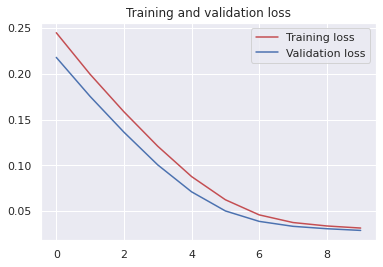

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
train_predict=model.predict(train_X)
test_predict=model.predict(test_X)
train_predict.shape, test_predict.shape

((1609, 1), (403, 1))

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(train_Y,train_predict)))
print("Train data MSE: ", mean_squared_error(train_Y,train_predict))
print("Train data MAE: ", mean_absolute_error(train_Y,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_Y,test_predict)))
print("Test data MSE: ", mean_squared_error(test_Y,test_predict))
print("Test data MAE: ", mean_absolute_error(test_Y,test_predict))

Train data RMSE:  0.1748236000916505
Train data MSE:  0.03056329114900534
Train data MAE:  0.1517273094317326
-------------------------------------------------------------------------------------
Test data RMSE:  0.17016371009336786
Test data MSE:  0.028955688232739748
Test data MAE:  0.14770322180300338
